# SVM(Support Vector Machine) Classification

Support Vector Machine은 머신러닝 분야에서 우수한 알고리즘 중에 하나로 데이터 형태에 맞는 Kernel 함수 및 Regularization를 선택하여 적용함으로써, 선형/비선형 데이터셋 및 분류/회귀 문제 모두에 사용할수 있습니다. 

Automatically created module for IPython interactive environment


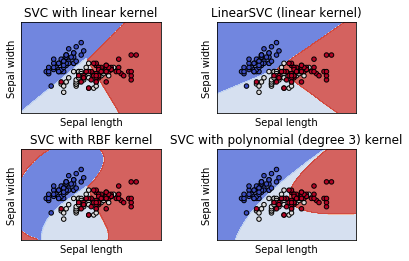

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#참조: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

RBF Kernel 함수는 SVM Kernel 함수들 중에 선형 비선형 데이터 모두에서 성능이 좋아 일반적인 많이 사용됩니다.

주요 파라미터
* C: 값이 클수록, Class내에 오류를 허용 하지 않음
* Gamma: 값이 클수록, 결정경계 (Decision Boundary) 가 정교해짐

![C, gamma](https://t1.daumcdn.net/cfile/tistory/996CB13359EB266A0F)

두 파마리터 모두 값이 클수록 학습용 데이터에 대한 분류 결정 경계는 명확해지지만 과적합(Overfitting) 가능성이 커지게 됩니다.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, svm, metrics

# 데이터
np.random.seed(0)
n_samples = 10000
np_data_xs, np_data_ys = datasets.make_classification(
    n_samples=n_samples, # 데이터 수
    n_features=10, # X feature 수
    n_informative=3,
    n_classes=3, # Y class 수
    random_state=0) # 난수 발생용 Seed 값
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_train_xs, np_test_xs, np_train_ys, np_test_ys = model_selection.train_test_split(
    np_data_xs, np_data_ys, 
    test_size=0.3, shuffle=True, random_state=2)
print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

# 모델
models = [
    svm.SVC(kernel='rbf', decision_function_shape='multinomial')
]

for model in models:
    # 학습
    print("model={}".format(model))
    model.fit(np_train_xs, np_train_ys)

    # 평가
    np_pred_ys = model.predict(np_test_xs)

    acc = metrics.accuracy_score(np_test_ys, np_pred_ys)
    print("acc={:.5f}".format(acc))

    cr = metrics.classification_report(np_test_ys, np_pred_ys)
    print("classification_report\n", cr)

data shape: np_data_xs=(10000, 10), np_data_ys=(10000,)
train shape: np_train_xs=(7000, 10), np_train_ys=(7000,)
test shape: np_test_xs=(3000, 10), np_test_ys=(3000,)
model=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='multinomial', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
acc=0.92833
classification_report
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1021
           1       0.93      0.91      0.92      1011
           2       0.91      0.99      0.95       968

   micro avg       0.93      0.93      0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

